In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

#Mounting our Drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
path = '/drive/MyDrive/Colab Notebooks/wifi.csv'
df = pd.read_csv(path)
df

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [3]:
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()
l1.fit(df['Room'])
df.Room = l1.transform(df.Room)
print(df)

      Wifi 1  Wifi 2  Wifi 3  Wifi 4  Wifi 5  Wifi 6  Wifi 7  Room
0        -64     -56     -61     -66     -71     -82     -81     0
1        -68     -57     -61     -65     -71     -85     -85     0
2        -63     -60     -60     -67     -76     -85     -84     0
3        -61     -60     -68     -62     -77     -90     -80     0
4        -63     -65     -60     -63     -77     -81     -87     0
...      ...     ...     ...     ...     ...     ...     ...   ...
1995     -59     -59     -48     -66     -50     -86     -94     3
1996     -59     -56     -50     -62     -47     -87     -90     3
1997     -62     -59     -46     -65     -45     -87     -88     3
1998     -62     -58     -52     -61     -41     -90     -85     3
1999     -59     -50     -45     -60     -45     -88     -87     3

[2000 rows x 8 columns]


In [12]:
room_dummies = pd.get_dummies(df['Room'])
df2 = pd.concat([df['Room'], room_dummies],axis=1)
df2

,Room,0,1,2,3
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
1995,3,0,0,0,1
1996,3,0,0,0,1
1997,3,0,0,0,1
1998,3,0,0,0,1


In [11]:
df2[1]

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: 1, Length: 2000, dtype: uint8

In [16]:
X = df.drop('Room',axis = 1)
Y = df2[[0, 1, 2, 3]]

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1995,0,0,0,1
1996,0,0,0,1
1997,0,0,0,1
1998,0,0,0,1


In [17]:
X

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7
0,-64,-56,-61,-66,-71,-82,-81
1,-68,-57,-61,-65,-71,-85,-85
2,-63,-60,-60,-67,-76,-85,-84
3,-61,-60,-68,-62,-77,-90,-80
4,-63,-65,-60,-63,-77,-81,-87
...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94
1996,-59,-56,-50,-62,-47,-87,-90
1997,-62,-59,-46,-65,-45,-87,-88
1998,-62,-58,-52,-61,-41,-90,-85


In [18]:
Y

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1995,0,0,0,1
1996,0,0,0,1
1997,0,0,0,1
1998,0,0,0,1


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)   #fit train only
X_test = scaler.transform(X_test)

In [21]:
from keras.models import Sequential 
from keras.layers import Dense
from keras import initializers
from keras import regularizers

In [29]:
#building the sequential model

#define Neuron in HL
L1 = 100
L2 = 200

model = Sequential()
model.add(Dense(L1, input_dim=7, activation='relu',
                ))
model.add(Dense(L2, activation = 'relu'))              

#output layer
model.add(Dense(4, activation='softmax'))              

In [30]:
#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics =['accuracy'], optimizer='adam')

In [31]:
#train the model for 10 epochs(iterations)
location = model.fit(X_train, Y_train, epochs=10, batch_size=100,
                    validation_data=(X_test,Y_test))

Epoch 1/10
16/16 [==============================] - 1s 13ms/step - loss: 0.9987 - accuracy: 0.6800 - val_loss: 0.6507 - val_accuracy: 0.8600
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4549 - accuracy: 0.9112 - val_loss: 0.3300 - val_accuracy: 0.9375
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.2346 - accuracy: 0.9469 - val_loss: 0.2047 - val_accuracy: 0.9625
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1517 - accuracy: 0.9594 - val_loss: 0.1549 - val_accuracy: 0.9650
Epoch 5/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.9675 - val_loss: 0.1280 - val_accuracy: 0.9700
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9694 - val_loss: 0.1071 - val_accuracy: 0.9775
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9712 - val_loss: 0.1009 - val_accuracy: 0.9750
Epoch 8/10
16/16 [=

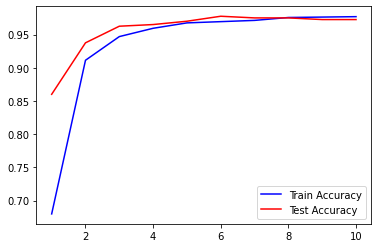

In [32]:
acc = location.history['accuracy']
val_acc = location.history['val_accuracy']
loss = location.history['loss']
val_loss = location.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Train Accuracy')
plt.plot(epochs, val_acc, 'r', label='Test Accuracy')
plt.legend()
plt.show()

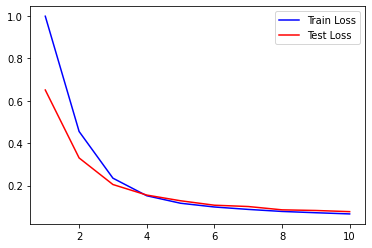

In [33]:
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Test Loss')
plt.legend()
plt.show()